# Worksheet 4

## Colour Spaces

## Task 1:
Read an Image and convert it to hsv/hsb colour space.

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

image = cv2.imread('../Practice-Images/lena.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


Display the following:
the original RGB Image
using the hsv/hsb version, brighten the image (without using a ready-mage function) and display the brightened version

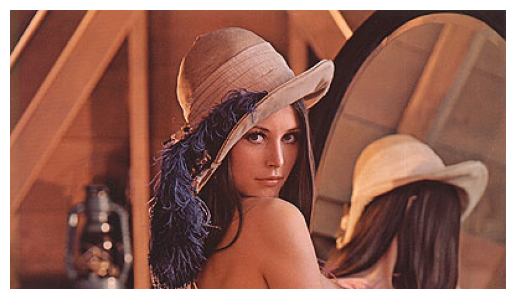

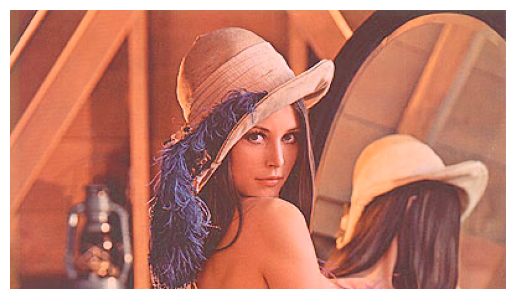

In [2]:
plt.axis('off')
plt.imshow(rgb)
plt.show()

def increase_brightness(img, value):
    # Splitting each color channel
    h,s,v = cv2.split(hsv)

    # Increase the brightness (value)
    # Getting the maximum value that v can be to not reach 255
    lim = 255 - value
    # if v is going to exceed 255, we set it to 255
    v[v > lim] = 255
    # else add the brightness
    v[v <= lim] += value

    # Rejoin(Merge) the channels to hsv
    merged = cv2.merge((h,s,v))

    # Converting from HSV color space to RGB and returning
    return cv2.cvtColor(merged, cv2.COLOR_HSV2RGB)

plt.axis('off')
plt.imshow(increase_brightness(rgb,50))
plt.show()

(339, 509, 3)


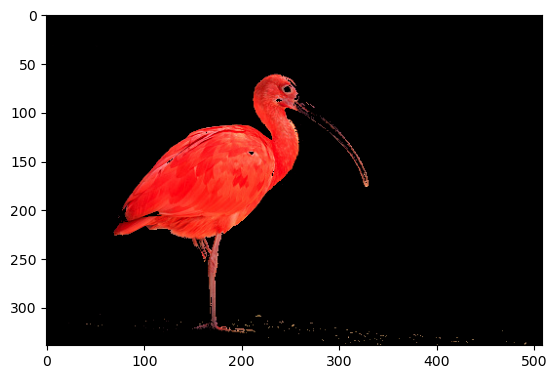

In [3]:
import numpy as np

im = cv2.imread('bird2.jpg')
imRGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

print(im.shape)

lower_bound = np.array([0, 100, 100], np.uint8)
upper_bound = np.array([20,255,255], np.uint8)
mask1 = cv2.inRange(imHSV, lower_bound, upper_bound)

lower_bound = np.array([165, 100, 0], np.uint8)
upper_bound = np.array([180,255,255], np.uint8)
mask2 = cv2.inRange(imHSV, lower_bound, upper_bound)

mask = mask1+mask2

result = cv2.bitwise_and(imRGB, imRGB, mask = mask)

plt.imshow(result)
plt.show()